In [1]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
data = pd.read_csv('1-BasicCV0707C100.csv')
data.columns = ['null','p', 'c', 'size', 'accTrain', 'accTest', 
                'f1Train', 'f1Test']
data = data[data['size']==1000]
data['model'] = 'LR('+data['p'].astype(str)+','+data['c'].astype(str)+')'
data.head()

,null,p,c,size,accTrain,accTest,f1Train,f1Test,model
0,0,1,2,1000,0.907000,0.601747,0.907314,0.597202,"LR(1,2)"
3,3,1,4,1000,0.929000,0.622463,0.930130,0.614682,"LR(1,4)"
6,6,1,6,1000,0.946464,0.612646,0.947260,0.589698,"LR(1,6)"
9,9,1,8,1000,0.954800,0.604087,0.955483,0.563326,"LR(1,8)"
12,12,1,10,1000,0.959846,0.599371,0.960462,0.571514,"LR(1,10)"


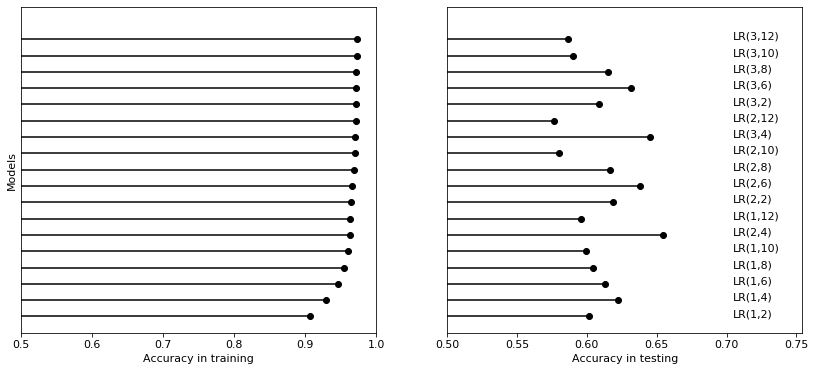

In [10]:
startLine = 0.5
ordered_df = data.sort_values(by=['accTrain'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['accTrain'], color='black')
plt.plot(ordered_df['accTrain'], my_range, "o",color ='black')
plt.xlabel('Accuracy in training')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=startLine, 
           xmax=ordered_df['accTest'], color='black')
plt.plot(ordered_df['accTest'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, ordered_df['accTest'].max()+0.1)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    plt.annotate(ordered_df['model'].iloc[j], xy=(ordered_df['accTest'].max()+0.05, j+1), 
                 xytext=(ordered_df['accTest'].max()+0.05, j+1))

In [19]:
data = pd.read_csv('results/MarginalLikelihood_rrlyr1.csv')
data.columns = ['a','b', 'c', 'd', 'e', 'f','g','h','i', 'j', 'l']


In [20]:
del data['f']
del data['g']

In [21]:
data = data[data['e']==1000]
data['model'] = 'BLR('+data['b'].astype(str)+','+data['c'].astype(str)+')'
data.head()

,a,b,c,d,e,h,i,j,l,model
1,1,1,2,-1.794711,1000,0.503,0.514900,0.000000,0.000000,"BLR(1,2)"
5,5,1,4,-2.118817,1000,0.459,0.492367,0.084602,0.130765,"BLR(1,4)"
9,9,1,6,-2.300855,1000,0.442,0.482410,0.091205,0.167827,"BLR(1,6)"
13,13,1,8,-2.299112,1000,0.377,0.488594,0.126227,0.261589,"BLR(1,8)"
17,17,1,10,-2.231774,1000,0.318,0.480384,0.078378,0.244745,"BLR(1,10)"


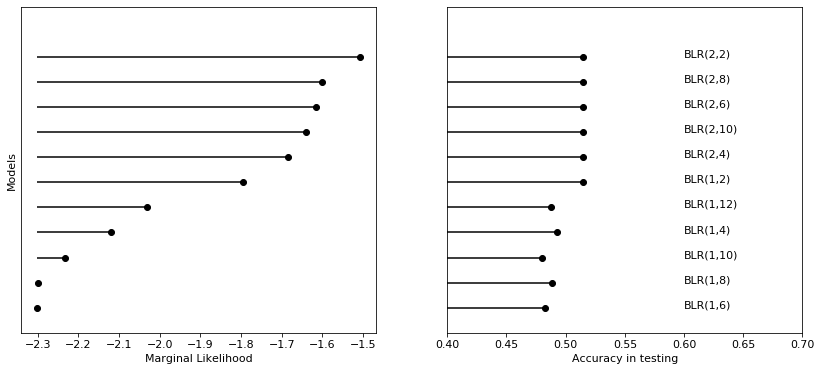

In [22]:
startLine = data['d'].min()
ordered_df = data.sort_values(by=['d'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['d'], color='black')
plt.plot(ordered_df['d'], my_range, "o",color ='black')
plt.xlabel('Marginal Likelihood')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
#plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=ordered_df['j'].min(), 
           xmax=ordered_df['i'], color='black')
plt.plot(ordered_df['i'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(0.4, .7)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    plt.annotate(ordered_df['model'].iloc[j], xy=(0.6, j+1), xytext=(0.6, j+1))